In [2]:
import pandas as pd
import requests

In [83]:
url1 = f'https://data.ripple.com/v2/network/topology/?verbose=true'
res = requests.get(url1)
xrp_accts = pd.DataFrame(res.json()['nodes'])
#xrp_accts

#xrp_accts.to_csv("test.csv",index=False,sep=',')

In [84]:
df = pd.read_csv('test.csv')
df.tail()

,node_public_key,ip,version,uptime,inbound_count,outbound_count,rowkey,country,country_code,lat,long,timezone,port,city,postal_code,region,region_code,isp
1011,n9KSw8RE8L42XHCyoUrSSuWRgT2rY2cn4kSiZmwE2vkvvt...,139.196.235.22,rippled-0.31.2,304459,2,2,n9KSw8RE8L42XHCyoUrSSuWRgT2rY2cn4kSiZmwE2vkvvt...,China,CN,30.294,120.1619,Asia/Shanghai,56235.0,Hangzhou,NaN,Zhejiang,ZJ,NaN
1012,n9MuUBrwCjeEyAqGb28rRMZx8RjVjsFn6xKaaGBbdEGAe1...,139.196.235.33,rippled-0.31.2,304435,3,1,n9MuUBrwCjeEyAqGb28rRMZx8RjVjsFn6xKaaGBbdEGAe1...,China,CN,30.294,120.1619,Asia/Shanghai,56235.0,Hangzhou,NaN,Zhejiang,ZJ,NaN
1013,n9MJNHoxFKExArPE5apWq2k2dLn5sZEqWCN5Z9jUkvWVzY...,10.25.47.193,rippled-0.31.2,304414,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,n9KUcZCHp6pXCvzA9oouXonYPjTuzHoEMugUfNRN2QqgLb...,NaN,rippled-1.3.1,660797,0,1,n9KUcZCHp6pXCvzA9oouXonYPjTuzHoEMugUfNRN2QqgLb...,India,IN,20.000,77.0000,Asia/Kolkata,NaN,NaN,NaN,NaN,NaN,Mahanagar Telephone Nigam Ltd.
1015,n9Ms3adk2vDZ7p2fsYoJqFqv9ViqtZRF5pcukThVcymBcV...,NaN,rippled-1.3.1,660799,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df.shape

(1016, 18)

In [86]:
df = df[['uptime','city','country','node_public_key','region']]
df.tail()

,uptime,city,country,node_public_key,region
1011,304459,Hangzhou,China,n9KSw8RE8L42XHCyoUrSSuWRgT2rY2cn4kSiZmwE2vkvvt...,Zhejiang
1012,304435,Hangzhou,China,n9MuUBrwCjeEyAqGb28rRMZx8RjVjsFn6xKaaGBbdEGAe1...,Zhejiang
1013,304414,NaN,NaN,n9MJNHoxFKExArPE5apWq2k2dLn5sZEqWCN5Z9jUkvWVzY...,NaN
1014,660797,NaN,India,n9KUcZCHp6pXCvzA9oouXonYPjTuzHoEMugUfNRN2QqgLb...,NaN
1015,660799,NaN,NaN,n9Ms3adk2vDZ7p2fsYoJqFqv9ViqtZRF5pcukThVcymBcV...,NaN


In [87]:
df = df.groupby('country').uptime.mean().to_frame().reset_index()

In [88]:
df.sort_values(by = 'uptime' , axis=0, ascending=False, inplace=True)

In [89]:
df

,country,uptime
22,Norway,2.116826e+06
35,United States,1.611216e+06
14,Japan,1.504008e+06
28,Slovakia,1.155798e+06
33,Ukraine,1.145861e+06
7,Germany,1.103925e+06
17,Latvia,9.657310e+05
20,Netherlands,9.007923e+05
27,Singapore,8.892396e+05
0,Australia,8.820545e+05


In [90]:
df.shape

(38, 2)

In [91]:
#df.isnull().sum()  # missing values
#df.dropna(how='any', inplace=True)

In [92]:
#df.shape

In [93]:
pd.unique(df['country'])
len(pd.unique(df['country']))

38

In [94]:
import seaborn as sns
%matplotlib inline

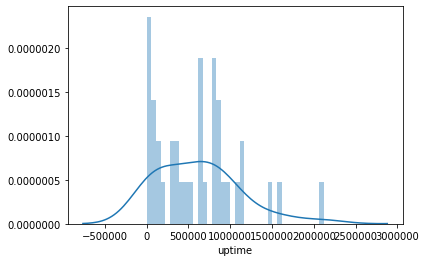

In [95]:
sns.distplot(df['uptime'], bins=38)
# Safe to ignore warnings

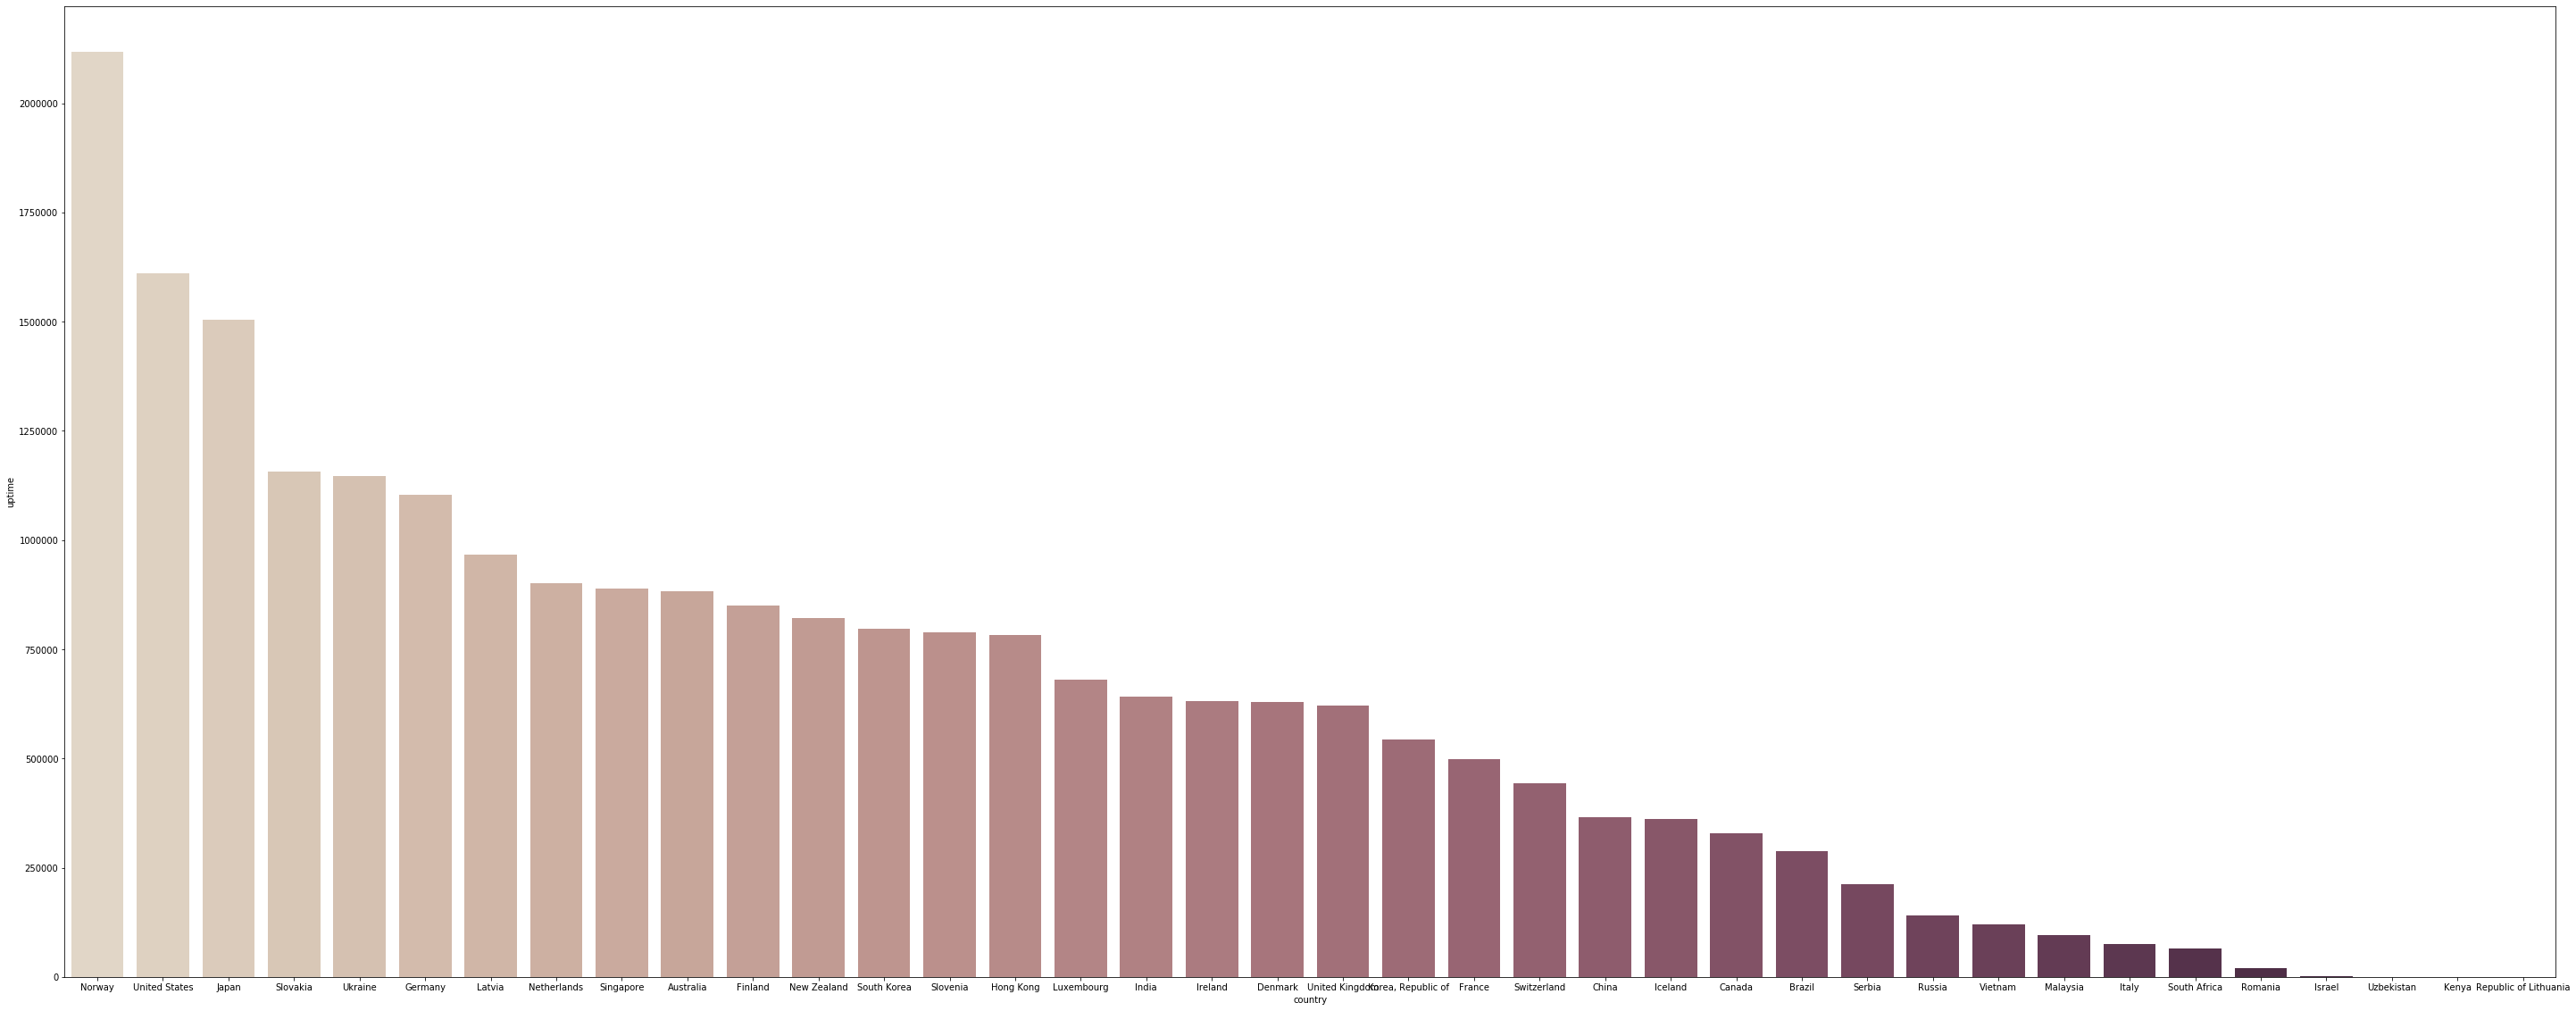

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
sns_plot = sns.barplot(x="country", y="uptime", palette="ch:.25", data=df)
fig = sns_plot.get_figure()
fig.savefig("output.png")

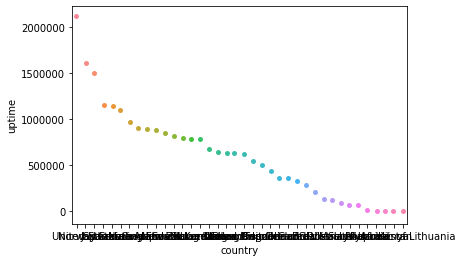

In [97]:
sns.stripplot(x="country", y="uptime", data=df, jitter=True)

In [98]:
import requests

In [161]:
url2 = f'https://data.ripple.com/v2/network/exchange_volume?'

res = requests.get(url2)
xrp_exchange_volume = pd.DataFrame(res.json()['rows'])['components']

In [178]:

from datetime import datetime, timedelta

def volume():
    end_time = datetime.utcnow()
    start_time = end_time - timedelta(days=1)

    start_time_string = start_time.strftime('%Y-%m-%dT%H:%M:%SZ')
    end_time_string = end_time.strftime('%Y-%m-%dT%H:%M:%SZ')
    url = 'https://data.ripple.com/v2/network/exchange_volume?start={}&end={}&limit=1000'.format(start_time_string,
                                                                                                  end_time_string)
    
    print(url)
    res = requests.get(url)
    xrp_exchange_volume = pd.DataFrame(res.json()['rows'])['components'][0]
    return xrp_exchange_volume 
volume()

https://data.ripple.com/v2/network/exchange_volume?start=2019-11-11T03:58:14Z&end=2019-11-12T03:58:14Z&limit=1000


[{'base': {'currency': 'USD', 'issuer': 'rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B'},
  'counter': {'currency': 'XRP'},
  'amount': '271648.3493930878',
  'count': 187,
  'rate': '0.27151200',
  'converted_amount': '1000503.6547240001'},
 {'base': {'currency': 'EUR', 'issuer': 'rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq'},
  'counter': {'currency': 'XRP'},
  'amount': '58346.769700061566',
  'count': 876,
  'rate': '0.24941000',
  'converted_amount': '233939.20385300086'},
 {'base': {'currency': 'XLM', 'issuer': 'rKiCet8SdvWxPXnAgYarFUXMh1zCPz432Y'},
  'counter': {'currency': 'XRP'},
  'amount': '334597.01053863333',
  'count': 418,
  'rate': '3.4633800',
  'converted_amount': '96610.07680300006'},
 {'base': {'currency': 'CNY', 'issuer': 'rKiCet8SdvWxPXnAgYarFUXMh1zCPz432Y'},
  'counter': {'currency': 'XRP'},
  'amount': '171114.54003649415',
  'count': 251,
  'rate': '1.9156400',
  'converted_amount': '89325.111652'},
 {'base': {'currency': 'CNY', 'issuer': 'razqQKzJRdB4UxFPWf5NEpEG3WMkmwgcXA'},
  'c

In [170]:
xrp_exchange_volume = pd.DataFrame(res.json()['rows'])['components']
xrp_exchange_volume

0    [{'base': {'currency': 'USD', 'issuer': 'rvYAf...
Name: components, dtype: object

In [160]:
import json
import ast
content = json.loads(res.content.decode('utf-8'))
dic = content['rows'][0]
#pd.DataFrame(content['rows'][0])
dic = dic['components']
#dic = dic[0]
#type(dic)
df = pd.DataFrame(dic).reset_index(drop = True)

L = [elem for elem in df['base']]
df2 = pd.DataFrame(L)
df2 = df2.rename(columns={"currency":"base_currency",'issuer':'base_issuer'})
df = df.join(df2)


L = [elem for elem in df['counter']]
df2 = pd.DataFrame(L)
df2 = df2.rename(columns={"currency":"counter_currency",'issuer':'counter_issuer'})
df = df.join(df2)
cols = ['amount', 'base_currency','base_issuer','converted_amount','count','counter_currency','counter_issuer','rate']
df_final = df[cols]
df_final.head()

,amount,base_currency,base_issuer,converted_amount,count,counter_currency,counter_issuer,rate
0,271443.3205506204,USD,rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B,999754.5275960002,179,XRP,NaN,0.27151000
1,58346.769700061566,EUR,rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq,233939.20385300086,876,XRP,NaN,0.24941000
2,182350.54783127463,CNY,rKiCet8SdvWxPXnAgYarFUXMh1zCPz432Y,95015.19821899998,251,XRP,NaN,1.9191700
3,283035.3795997556,XLM,rKiCet8SdvWxPXnAgYarFUXMh1zCPz432Y,81690.83787900003,352,XRP,NaN,3.4647100
4,120026.49063976973,CNY,razqQKzJRdB4UxFPWf5NEpEG3WMkmwgcXA,62439.09481679536,54,CNY,rKiCet8SdvWxPXnAgYarFUXMh1zCPz432Y,1.9223000


In [132]:
for i in range(len(df['amount'])):
    df['amount'][i] = float(df['amount'][i]) 

/Users/salomeschwarz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
df['amount'].apply(pd.to_numeric)

0     271892.744348
1      58346.769700
2     178250.183181
3     134656.566298
4     220443.687996
5     112988.472464
6      88454.328210
7       8891.489016
8          0.979441
9       2307.627241
10     60872.824584
11      8934.716973
12         0.107983
13      4610.879547
14       592.855595
15         2.735769
Name: amount, dtype: float64

In [135]:
type(df['amount'][0])

float

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

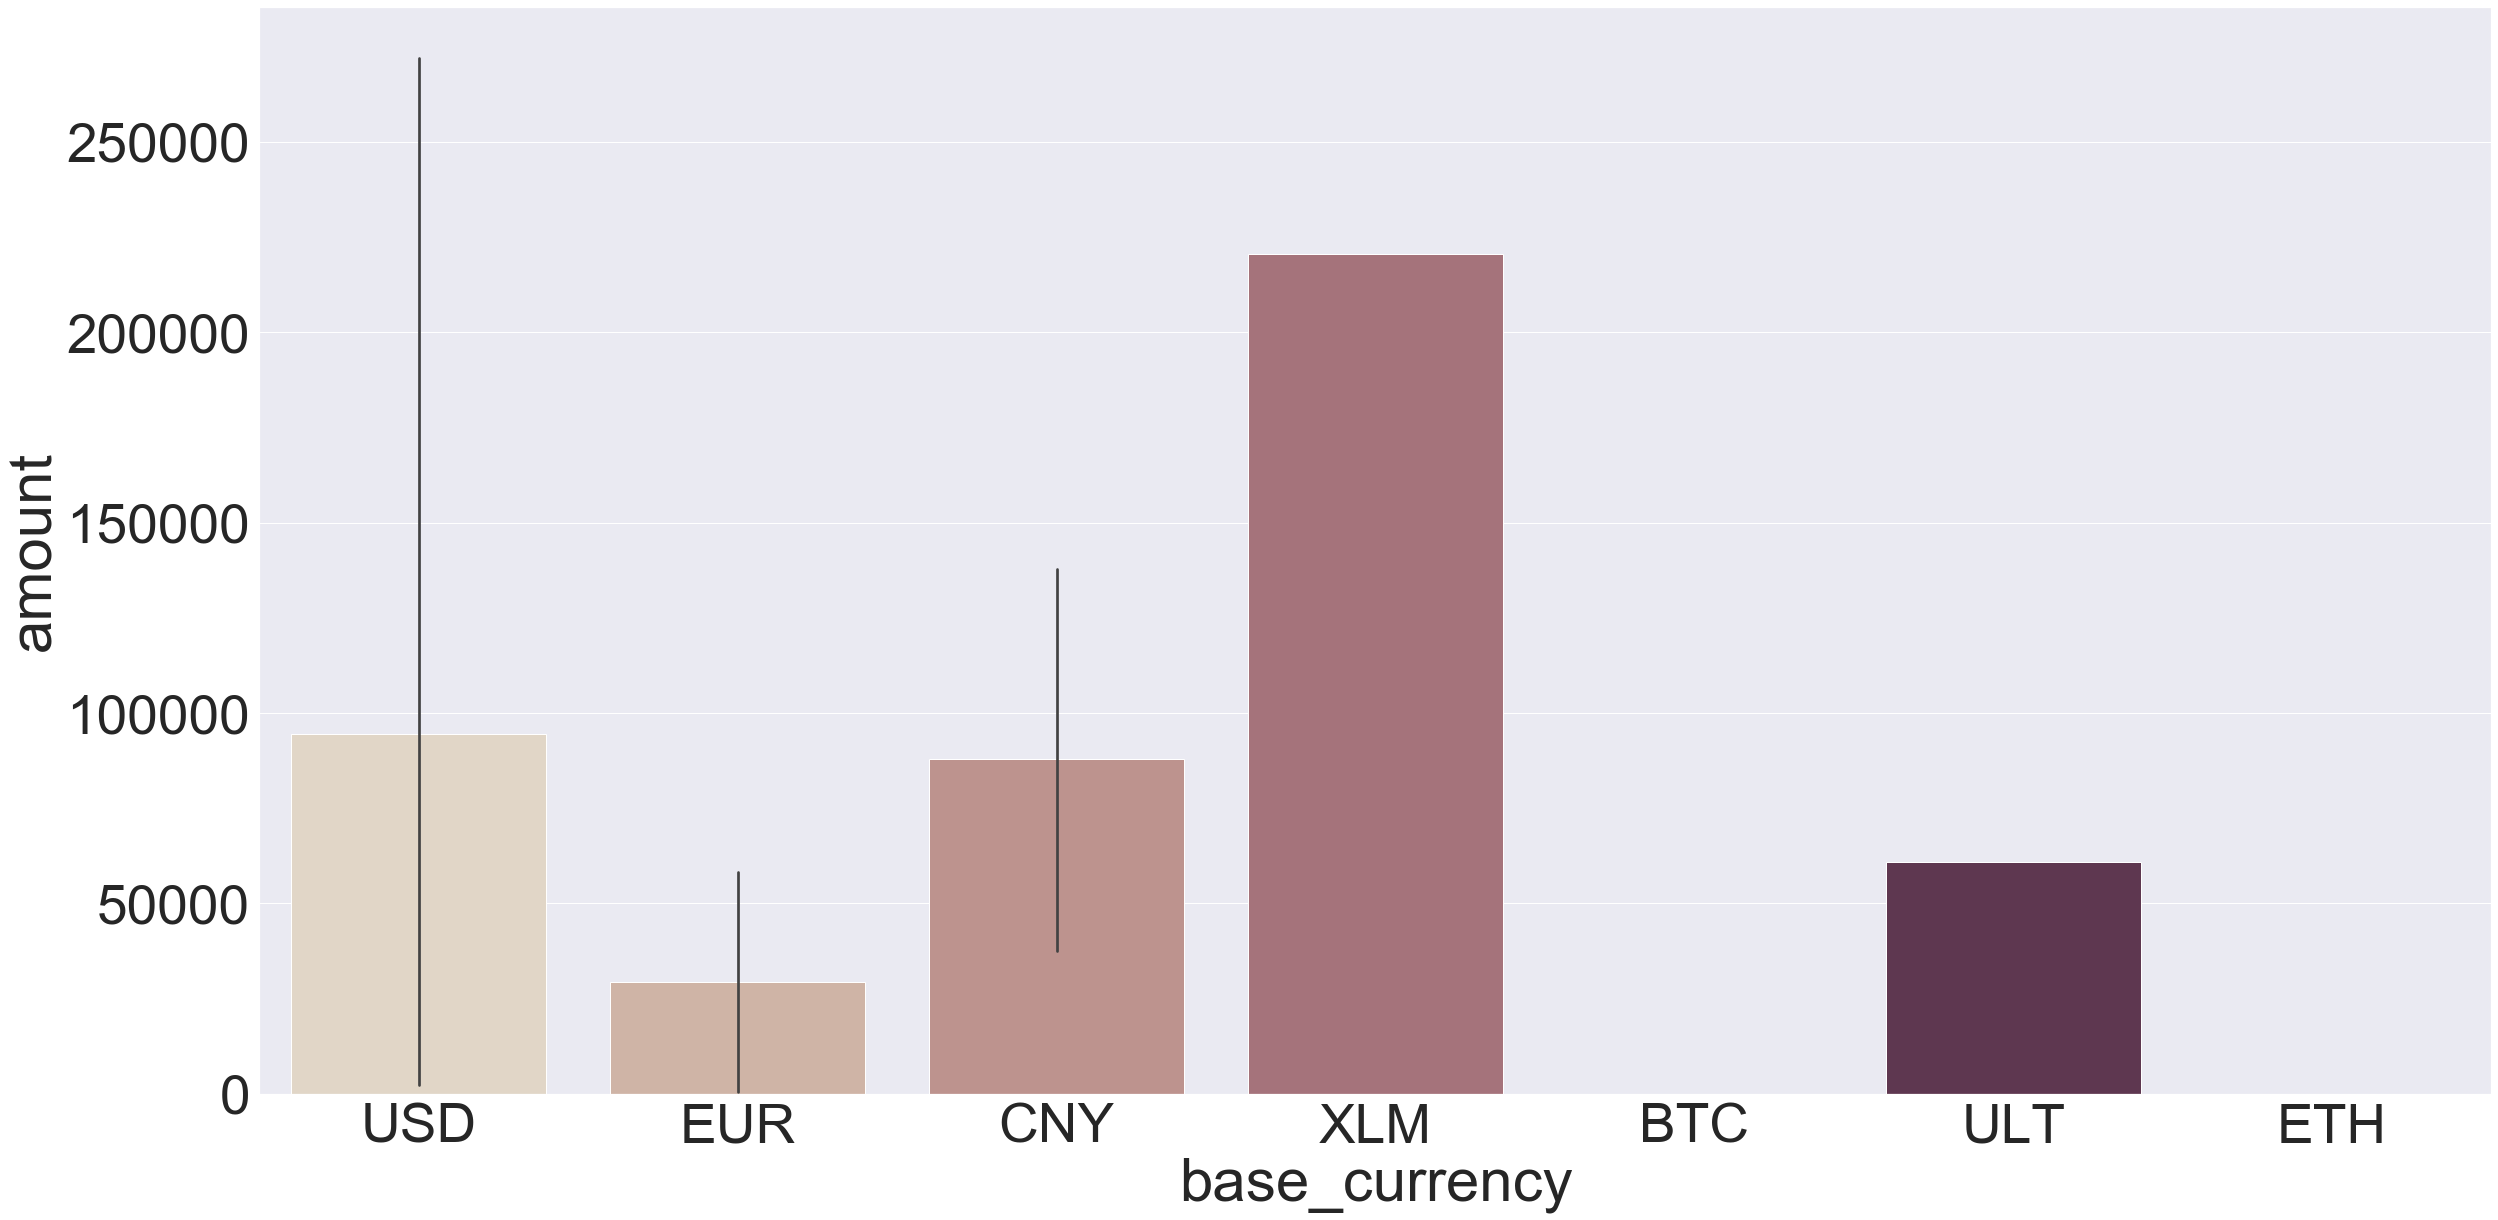

In [152]:
axes = {'xaxis': df['base_currency'], 'yaxis': df['amount']}
plt.figure(figsize=(40,20))
sns.set(font_scale=5)
sns_plot = sns.barplot(x = axes['xaxis'], y = axes['yaxis'], orient='v', palette="ch:.25")
fig = sns_plot.get_figure()
fig.savefig("volume.png")